# Lab Case Study
## Scenario
You are working as an analyst for an auto insurance company. The company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.
## Business Objectives
- Retain customers,
- analyze relevant customer data,
- develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.
## Activities
Refer to the `Activities.md` file where you will find guidelines for some of the activities that you want to do.
## Data
The csv files is provided in the folder. The columns in the file are self-explanatory.

### Activity 1
- Aggregate data into one Data Frame using Pandas.
- Standardizing header names
- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
- Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints)
- Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
- Removing duplicates
- Replacing null values – Replace missing values with means of the column (for numerical columns)

### Activity 2
- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- Standardizing the data – Use string functions to standardize the text data (lower case)

### Activity 3
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
- BONUS: Put all the previously mentioned data transformations into a function/functions.

### Activity 4
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't Limit your creativity! plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution

- Normalize (numericals)

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

- Bonus: split Data set into train and test sets


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc
from ipywidgets import interactive
import ipywidgets as widgets
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
#Function to aggregate data into one Data Frame using Pandas.
def load_original_data():
    return pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv" )

In [79]:
def clean_data(df):
    df.columns=[name.lower().replace(' ', '_') for name in df.columns]
    df=df.drop(columns=['unnamed:_0', 'vehicle_type'])
#    df=df.dropna()
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce')
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"]))
    return df

In [80]:
#Run loading function
df_customer = load_original_data()

In [81]:
#Apply data cleaning function
df_customer = clean_data(df_customer)
df_customer

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,January
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,February
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,February


- Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data

Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of complaints)

In [82]:
df_customer.dtypes
# cust. lifetime value is already float64
# Round numbers in a numerical column with apply and lambda function
#df_customer['customer_lifetime_value'].apply(lambda x: round(x, 2))
df_customer['customer_lifetime_value'].describe()

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: customer_lifetime_value, dtype: float64

### Activity 2
- Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central
- Standardizing the data – Use string functions to standardize the text data (lower case)

In [83]:
#df_customer['zones'] = df_cust['state']
#df_customer = df_cust [['customer', 'zones', 'state', 'customer_lifetime_value', 'response',
#       'coverage', 'education', 'effective_to_date', 'employmentstatus',
#       'gender', 'income', 'location_code', 'marital_status',
#       'monthly_premium_auto', 'months_since_last_claim',
#       'months_since_policy_inception', 'number_of_open_complaints',
#       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
#       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
#       'vehicle_type']]
#df_customer

In [84]:
#df_cust['state'].unique()

In [85]:
'''def zones_group(x):
    # checking for NaN. If x is NaN, return x
    if not x==x:
        return x
    else:

        dct_ = {'Washington':'west_coast',
                'Arizona':'midwest',
                'Nevada':'midwest',
                'California':'west_coast',
                'Oregon':'west_coast',
               }
        
        return dct_[x]

df_cust['zones'] = df_cust['state'].apply(zones_group)'''

"def zones_group(x):\n    # checking for NaN. If x is NaN, return x\n    if not x==x:\n        return x\n    else:\n\n        dct_ = {'Washington':'west_coast',\n                'Arizona':'midwest',\n                'Nevada':'midwest',\n                'California':'west_coast',\n                'Oregon':'west_coast',\n               }\n        \n        return dct_[x]\n\ndf_cust['zones'] = df_cust['state'].apply(zones_group)"

### Activity 3
- Which columns are numerical?
- Which columns are categorical?
- Check and deal with NaN values. (Hint:Replacing null values – Replace missing values with means of the column (for numerical columns)).
- Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [86]:
#Selection of numerical columns
#print(df_cust.select_dtypes(include = ['int', 'float'] ))
def fillnan():
    df_cust.select_dtypes(include = ['int', 'float'] )
    return True
    
print(df_customer.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [87]:
df_customer.select_dtypes(include = ['int', 'float'] ).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10910 non-null  float64
 1   income                         10910 non-null  int64  
 2   monthly_premium_auto           10910 non-null  int64  
 3   months_since_last_claim        10277 non-null  float64
 4   months_since_policy_inception  10910 non-null  int64  
 5   number_of_open_complaints      10277 non-null  float64
 6   number_of_policies             10910 non-null  int64  
 7   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 682.0 KB


In [88]:
#Export to check data manipulation in excel
#df_customer.to_csv('testfile_customer1.csv', index = False)

In [89]:
df_customer['customer_lifetime_value'].describe()

count    10910.000000
mean      8018.241094
std       6885.081434
min       1898.007675
25%       4014.453113
50%       5771.147235
75%       8992.779137
max      83325.381190
Name: customer_lifetime_value, dtype: float64

In [90]:
df_customer.mean()

<ipython-input-90-3de3b9a4b64c>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_customer.mean()
<ipython-input-90-3de3b9a4b64c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_customer.mean()


customer_lifetime_value           8018.241094
income                           37536.284785
monthly_premium_auto                93.196059
months_since_last_claim             15.149071
months_since_policy_inception       48.091934
number_of_open_complaints            0.384256
number_of_policies                   2.979193
total_claim_amount                 434.888330
dtype: float64

In [91]:
#while fillnan() == True:
#        df_customer = df_customer.fillna(value = df_customer.mean())
#        break
#df_customer
df_customer.select_dtypes(include = ['int', 'float'] ).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        10910 non-null  float64
 1   income                         10910 non-null  int64  
 2   monthly_premium_auto           10910 non-null  int64  
 3   months_since_last_claim        10277 non-null  float64
 4   months_since_policy_inception  10910 non-null  int64  
 5   number_of_open_complaints      10277 non-null  float64
 6   number_of_policies             10910 non-null  int64  
 7   total_claim_amount             10910 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 682.0 KB


### Activity 5

- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [92]:
df_numerical = df_customer.select_dtypes(include=np.number)
df_categorical = df_customer.select_dtypes(include=object)
df_categorical
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


Now we will try to check the normality of the numerical variables visually

- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


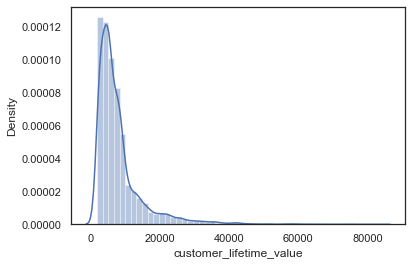

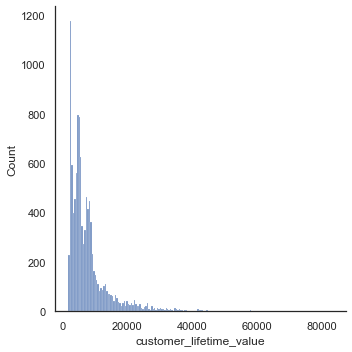

In [93]:
sns.distplot(df_numerical['customer_lifetime_value'], hist=True)
sns.displot(df_numerical['customer_lifetime_value'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


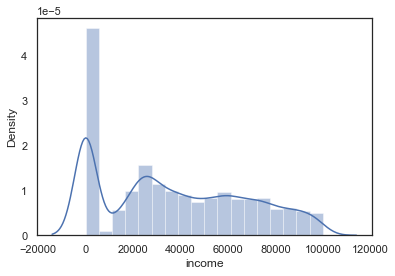

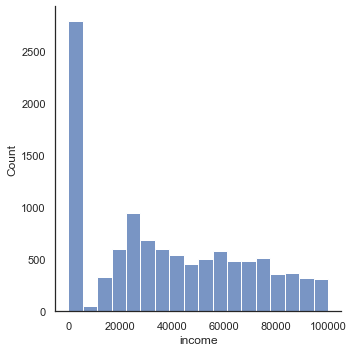

In [94]:
#sns.displot(samples,hist=True)#sns.histplot(samples)
sns.distplot(df_numerical['income'], hist=True)
sns.displot(df_numerical['income'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


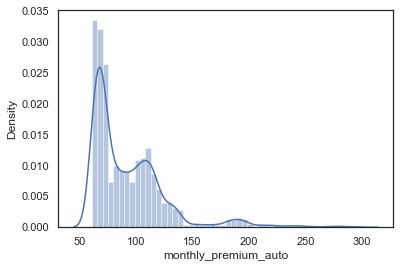

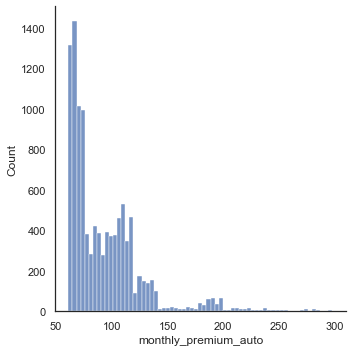

In [95]:
sns.distplot(df_numerical['monthly_premium_auto'], hist=True)
sns.displot(df_numerical['monthly_premium_auto'],)
plt.show()

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


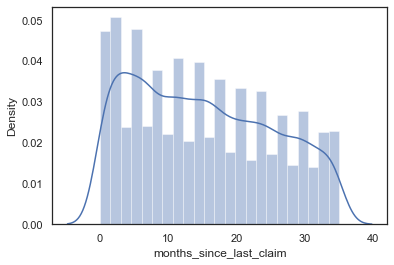

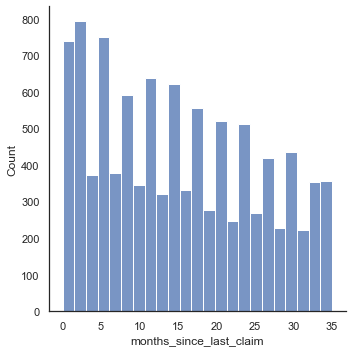

In [96]:
#  	months_since_policy_inception 	number_of_open_complaints 	number_of_policies 	total_claim_amount
sns.distplot(df_numerical['months_since_last_claim'], hist=True)
sns.displot(df_numerical['months_since_last_claim'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


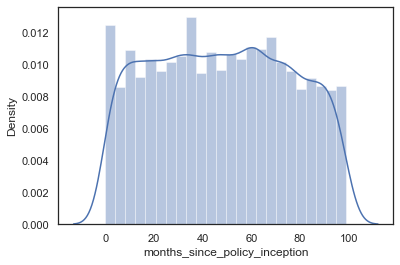

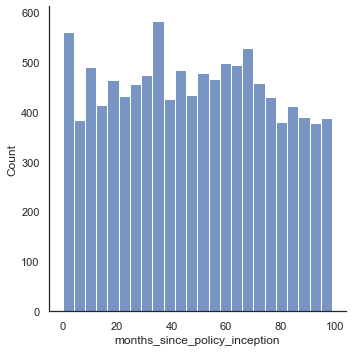

In [97]:
#  	 	number_of_open_complaints 	number_of_policies 	total_claim_amount
sns.distplot(df_numerical['months_since_policy_inception'], hist=True)
sns.displot(df_numerical['months_since_policy_inception'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


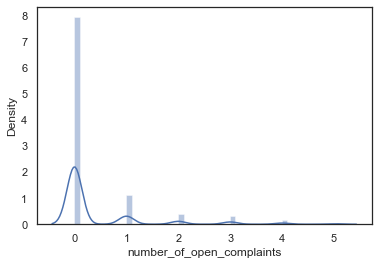

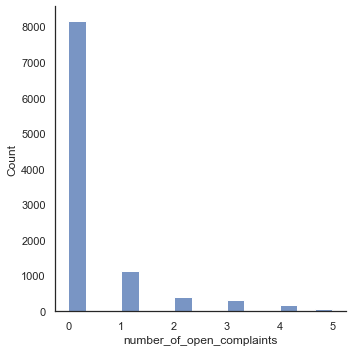

In [98]:
#
sns.distplot(df_numerical['number_of_open_complaints'], hist=True)
sns.displot(df_numerical['number_of_open_complaints'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


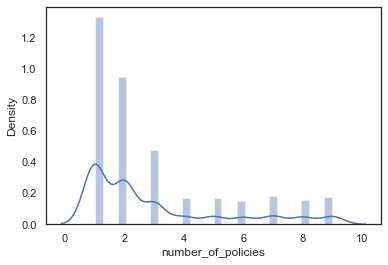

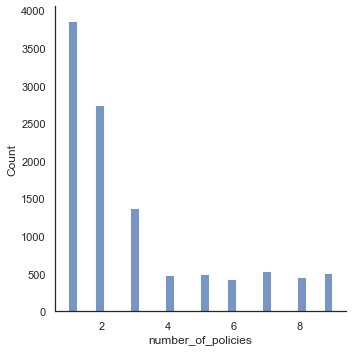

In [99]:
#
sns.distplot(df_numerical['number_of_policies'], hist=True)
sns.displot(df_numerical['number_of_policies'],)

/Users/mspro/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


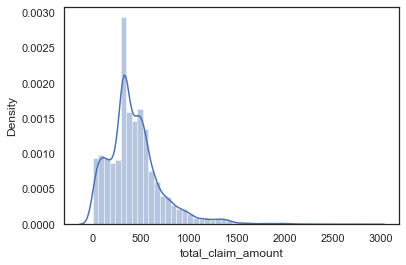

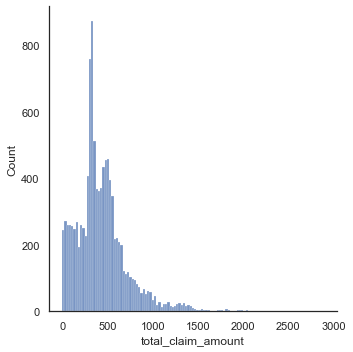

In [100]:
sns.distplot(df_numerical['total_claim_amount'], hist=True)
sns.displot(df_numerical['total_claim_amount'],)

- Normalize (numericals)

- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [101]:
df_numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


<AxesSubplot:>

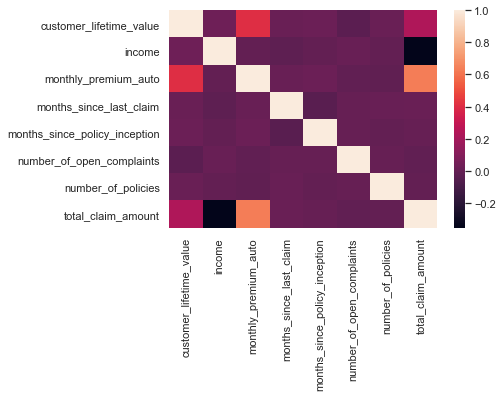

In [102]:
sns.heatmap(df_numerical.corr())

In [103]:
#vmin, vmax — set the range of values that serve as the basis for the colormap
#cmap — sets the specific colormap we want to use (check out the library of a wild range of color palettes here)
#center — takes a float to center the colormap; if no cmap specified, will change the colors in the default 
#         colormap; if set to True — it changes all the colors of the colormap to blues
#annot — when set to True, the correlation values become visible on the colored cells
#cbar — when set to False, the colorbar (that serves as a legend) disappears

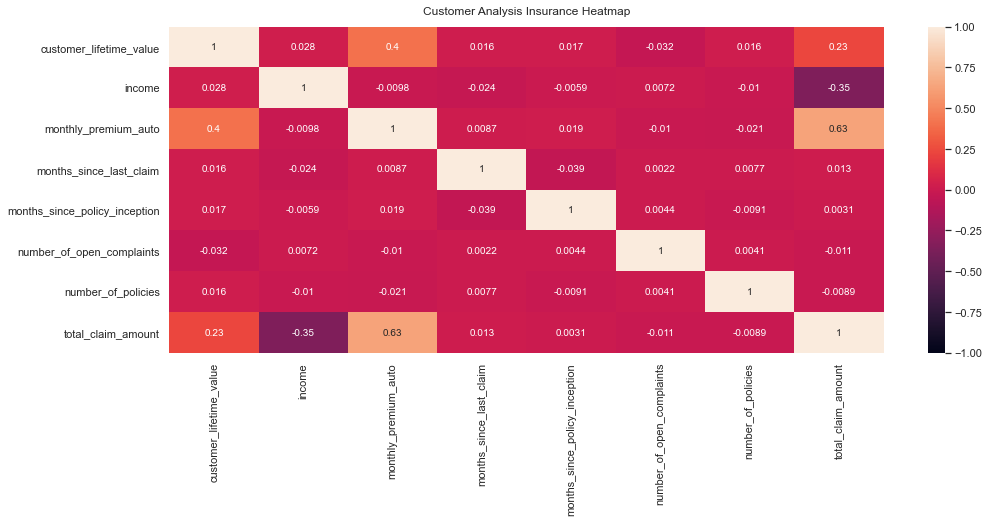

In [104]:
#Increase the size of the heatmap.
plt.figure(figsize = (16, 6))
#Store heatmap object in a variable to easily access it when you want to include more features (such as title).
#Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True 
#.  to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_numerical.corr(), vmin=-1, vmax=1, annot=True)
#Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Customer Analysis Insurance Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:>

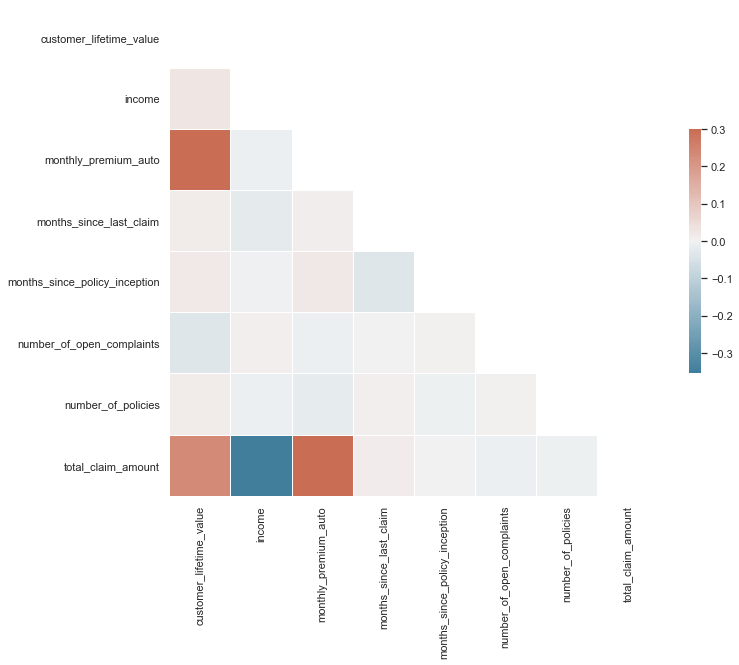

In [105]:
#sns.heatmap(df_numerical,vmin=0,vmax=1)

sns.set_theme(style="white")
# Compute the correlation matrix
corr = df_numerical.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [108]:
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


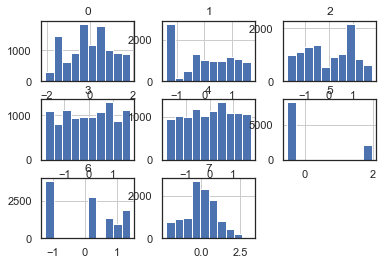

In [113]:
# visualize a box-cox transform of the sonar dataset
#from pandas import read_csv
from pandas import DataFrame
#from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
#dataset = read_csv(url, header=None)

# retrieve just the numeric input values
#data = df_numerical.values[:, :]

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
df_numerical = pipeline.fit_transform(df_numerical)

# convert the array back to a dataframe
dataset = DataFrame(df_numerical)

# histograms of the variables
dataset.hist()
pyplot.show()

- Bonus: split Data set into train and test sets

In [114]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_customer, test_size = 0.2)

In [115]:
len(train)

8728

In [116]:
len(test)

2182

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

### Activity 4
- Show a plot of the total number of responses.
- Show a plot of the response rate by the sales channel.
- Show a plot of the response rate by the total claim amount.
- Show a plot of the response rate by income.
- Don't Limit your creativity! plot Any interesting findings/insights that describe some interesting facts about your data set and its variables. Use the relevant plotting when you feel it is needed.
- Plot the Correlation Heatmap.
- Clean your notebook and make it a readible and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [13]:
# Adding a column['response_num'] to the original data source (df_cust), ['response_num'] holds 1 if response 'Yes'
# and 0 if response 'No'. With ['response_num'] we can calculate, e. g. the rate of a positive response.
# Problem with approach is, that the NaN are set 0, it would be better to filter them out.
def num(i):
    # checking for NaN. If x is NaN, return i
    if not i==i:
        return 0
    else:
        dct_ = {'Yes':1,
                'No':0,
               }
        return dct_[i]

df_cust['response_num'] = df_cust['response'].apply(num)

Index(['No', 'Yes'], dtype='object')
No     8813
Yes    1466
Name: response, dtype: int64


<AxesSubplot:>

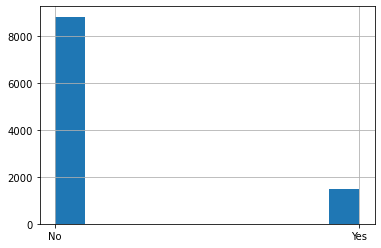

In [14]:
# Testing with a histogram the distribution of ['response']
response = df_cust['response'].value_counts()
print(response.index)
print(response)
df_cust['response'].hist()

In [28]:
df_cust['total_claim_amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total_claim_amount, dtype: float64

<AxesSubplot:title={'center':'Bar total number of responses'}, ylabel='response'>

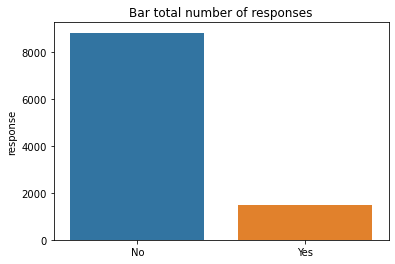

In [15]:
# Histogram counting the 'No' and 'Yes' responses. Create figure and axes: subplots()
fig1, ax1 = plt.subplots()
# set title: set_title()
ax1.set_title("Bar total number of responses")
df_cust['response'].index
# plot the bar chart: bar()
sns.barplot(x=response.index ,y =response)

In [16]:
# Filter source data table (df_cust['response']) to 'Yes' | 'No' - maybe filter helps us with pos. response rate.
# To get rid of NaN values for calculating later the total response numbers per sales_channel.
# df[(df[py-score] >= 80) & (df[js-score] >= 80)]
df_yes_no_resp = df_cust[(df_cust['response'] == 'Yes') | (df_cust['response'] == 'No')]
df_yes_no_resp = df_yes_no_resp[['response', 'response_num', 'sales_channel']]
df_yes_no_resp

,response,response_num,sales_channel
0,No,0,Agent
1,No,0,Call Center
2,No,0,Call Center
3,Yes,1,Branch
4,No,0,Branch
...,...,...,...
10904,No,0,Branch
10905,No,0,Web
10906,No,0,Branch
10907,No,0,Web


In [17]:
#Group by sales channel, first groupby sales_channel & count responses per sales channel df[df["class"]==1].count()
#df[(df[py-score] >= 80) & (df[js-score] >= 80)]
#[df_cust[df_cust['response']=='Yes']].count()
df_group_channel = df_cust.groupby(['sales_channel', 'response'])['response_num'].count().reset_index()
df_group_channel

,sales_channel,response,response_num
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


In [18]:
#Define colors for chart
sns.set_palette('RdYlGn')
palette_resp = {"Yes": "C5", "No": "C0"}

<AxesSubplot:title={'center':'Responses per sales channel'}, xlabel='sales_channel', ylabel='response_num'>

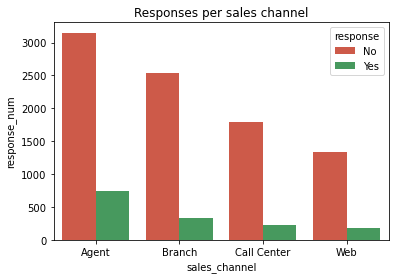

In [19]:
#Chart number of responses (Yes / No) per Sales Channel
# Start with matplotlib subplots()
fig_resp, ax_resp = plt.subplots()
# set the title using: set_title()
ax_resp.set_title("Responses per sales channel")

# uses seaborn barplot(x, y, hue = , palette = ) function
sns.barplot(x = df_group_channel['sales_channel'], y = df_group_channel['response_num'], hue = df_group_channel['response'], palette=palette_resp)

In [20]:
# Question: how can I get a SumIf, CountIf?? (df.map(lambda x: condition)
# With SumIf, CountIf the response rate could be calculated while ignoring the NaN for ['response'].
# To solve the problem a filtered df (df_yes_no_resp) is used to count valid responses per sales_channel.
df_group_channel_calc = df_yes_no_resp.groupby(['sales_channel',])['response_num'].count().reset_index()
df_group_channel_calc

,sales_channel,response_num
0,Agent,3890
1,Branch,2865
2,Call Center,2013
3,Web,1511


In [21]:
# Calculate pos. response rates (Yes) per sales channel
# df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100)
df_group_channel2 = df_cust.groupby(['sales_channel'])['response_num'].sum().reset_index()
df_group_channel2['response_rate'] = df_group_channel2['response_num'].div(df_group_channel_calc['response_num'], axis=0)
# Adding total number of resp. ['total_resp'] to df_group_channel2
df_group_channel2['total_resp'] = df_group_channel_calc['response_num']
df_group_channel2

,sales_channel,response_num,response_rate,total_resp
0,Agent,742,0.190746,3890
1,Branch,326,0.113787,2865
2,Call Center,221,0.109786,2013
3,Web,177,0.117141,1511


In [22]:
df_ = df_group_channel2['response_num'].div(df_group_channel_calc['response_num'], axis=0)
df_

0    0.190746
1    0.113787
2    0.109786
3    0.117141
Name: response_num, dtype: float64

<AxesSubplot:title={'center':'Positive response rate per sales channel'}, xlabel='sales_channel', ylabel='response_rate'>

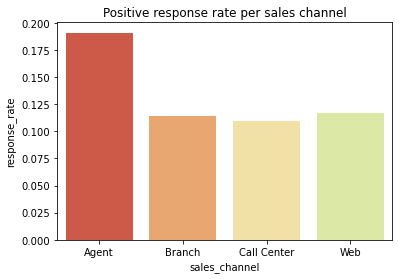

In [23]:
# Chart showing the pos. response rate per sales_channel - stacked bar chart would be better
fig_resp, ax_resp = plt.subplots()
# set the title using: set_title()
ax_resp.set_title("Positive response rate per sales channel")

# uses seaborn barplot(x, y, hue = , palette = ) function
sns.barplot(x = df_group_channel2['sales_channel'], y = df_group_channel2['response_rate'])

In [25]:
print(df_group_channel['sales_channel'])

0          Agent
1          Agent
2         Branch
3         Branch
4    Call Center
5    Call Center
6            Web
7            Web
Name: sales_channel, dtype: object


TypeError: Neither the `x` nor `y` variable appears to be numeric.

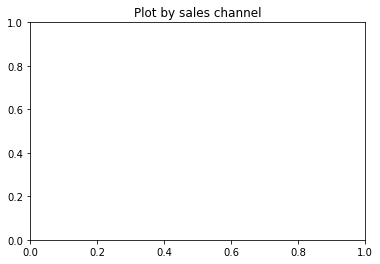

In [24]:
sns.set_palette('RdYlGn')
palette_sales = {"yes": "C5", "no": "C0"}
# matplotlib subplots() function
fig2, ax2 = plt.subplots()
# set the title using: set_title()
ax2.set_title("Plot by sales channel")
# use of seaborn for barplot(x, y, hue = , palette = ) function
sns.barplot(x = df_group_channel['sales_channel'], y = df_group_channel['response'])

In [69]:
df_cust['total_claim_amount'].describe()

count    10910.000000
mean       434.888330
std        292.180556
min          0.099007
25%        271.082527
50%        382.564630
75%        547.200000
max       2893.239678
Name: total_claim_amount, dtype: float64

In [46]:
# Need to build a df with only numerical columns first, can be done with .select if dtype of column != 'object'
sns.heatmap(df_cust,vmin=0,vmax=1)

ValueError: could not convert string to float: 'midwest'

In [50]:
# 
df_cust.dtypes

counter                                   int64
zones                                    object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        